# Iris Analytics AI Coding Challenge
## Intro
Hello, and thank you for interviewing with us! At Iris Analytics, we're on a mission to provide companies and researchers with the best data science talent the world can offer. Our platform seeks to enable data science collaboration on a global scale, handled by our marketplace. To do this, we have to ensure that we only take the best and brightest. That means you!

## Challenge
This challenge is focused on necessary data science skills like cleaning, exploration, and visualization. Because the Iris marketplace has you bid hours on tasks, this challenge will be timed. It is not recommended that you spend more than 2 hours on this challenge.This is to ensure that our data scientists get paid fairly and can perform the work in reasonable amounts of time.

### Timing
The timing is defined by the timestamp of your first edit (logged in the revision history) and the timestamp of your emailed solution notebook.

### Questions?
If you have any questions about the challenge, feel free to email cprinzz@gmail.com.

### Summary
Scores will be determined based on your completeness and accuracy first, and your time second. No revisions can be made after the submission. We will get back to you within 48 hours with your result. Good luck, and again, thank you for your interest in becoming an Iris Analytics data scientist!

## Amazon Alexa Review Dataset

The imported dataset contains reviews from the Amazon Alexa. The goal of this challenge is to clean, explore, and visualize this data to create a sentiment analysis model to predict the rating based on the review text. Let's get started.

In [0]:
# Standard imports. You can import any other packages needed. You can install
# additional packages by using:
# !pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.filterwarnings("ignore", category=Warning)
print('Warnings will be ignored!')


Warnings will be ignored!


In [0]:
# Fetch dataset
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t')
print(df.head(20))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
1        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
4        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    
11       5  30-Jul-18      Charcoal Fabric    
12       5  30-Jul-18           Oak Finish    
13       5  30-Jul-18      Charcoal Fabric    
14       5  30-Jul-18           Oak Finish    
15       5  30-Jul-18  Heather Gray Fabric    
16       5  30-Jul-18  Heather Gray Fabric    
17       5  30-Jul-18  Heather Gray Fabric    
18       5  30-Jul-18      Charcoal Fabric    
19       4  30-Jul-18     Sandstone Fabric    

            

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


## Cleaning

It's been discovered that all verified_reviews that are only say "love it" or are only one word are actually fake. Reviews like "great!" or "Love It!" need to be removed from the dataset.

In the cell below, remove one word and "love it" reviews from the dataset.

In [0]:
# convert all strings to lowercase
df['verified_reviews'] = df['verified_reviews'].str.lower()

In [0]:
# remove punctuation
import string
df['verified_reviews'] = df['verified_reviews'].str.replace('[{}]'.format(string.punctuation), '')

In [0]:
# remove 'love it' and 'loved it'
df = df[df['verified_reviews'] != 'love it']
df = df[df['verified_reviews'] != 'loved it']

In [0]:
print(df.head(10))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
4        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    

                                     verified_reviews  feedback  
0                                        love my echo         1  
2   sometimes while playing a game you can answer ...         1  
3   i have had a lot of fun with this thing my 4 y...         1  
4                                               music         1  
5   i received the echo as a gift i needed another...         1  
6   without having a cellphone i cannot use many o...         1  
7   i think this is 

In [0]:
# create word count feature
df['word_count'] = df['verified_reviews'].str.split().apply(len)

In [0]:
df = df[df['word_count'] != 1]

In [0]:
print(df.head(10))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    
11       5  30-Jul-18      Charcoal Fabric    

                                     verified_reviews  feedback  word_count  
0                                        love my echo         1           3  
2   sometimes while playing a game you can answer ...         1          38  
3   i have had a lot of fun with this thing my 4 y...         1          34  
5   i received the echo as a gift i needed another...         1          32  
6   without having a cellphone i cannot use many o...         1          75  
7   i think th

# Datetime Features

Add some datetime features for better visualization and possibly predictions

In [0]:
df['datetime'] = pd.to_datetime(df['date'])

In [0]:
# create function to extract datetime features
def date_extraction(feature):
    day_of_year_list = []
    day_of_week_list = []
    
    for i in feature:
        day_of_year_list.append(i.dayofyear)
        day_of_week_list.append(i.dayofweek)
    
    return day_of_year_list, day_of_week_list

In [0]:
df['day_of_year'] = date_extraction(df['datetime'])[0]

In [0]:
df['day_of_week'] = date_extraction(df['datetime'])[1]

In [0]:
print(df.head(10))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    
11       5  30-Jul-18      Charcoal Fabric    

                                     verified_reviews  feedback  word_count  \
0                                        love my echo         1           3   
2   sometimes while playing a game you can answer ...         1          38   
3   i have had a lot of fun with this thing my 4 y...         1          34   
5   i received the echo as a gift i needed another...         1          32   
6   without having a cellphone i cannot use many o...         1          75   
7   i th

In [0]:
df['datetime'].value_counts()[:10]

2018-07-30    1544
2018-07-29     464
2018-07-28     236
2018-07-26      84
2018-07-31      77
2018-07-25      40
2018-07-27      36
2018-07-19      35
2018-07-20      28
2018-07-24      25
Name: datetime, dtype: int64

In [0]:
dt_min = df['datetime'].min()

In [0]:
dt_max = df['datetime'].max()

In [0]:
dt_diff = dt_max - dt_min
print(dt_diff)

76 days 00:00:00


## Visualization

In the cells below:
1.   Create a bar graph showing the number of reviews per day from the date of the first review to the date of the last review
2.   Create a histogram of ratings

All graphs must have labels for X and Y axes.



In [0]:
# Create a bar graph showing the number of reviews per day from the date of the
# first review to the date of the last review

''

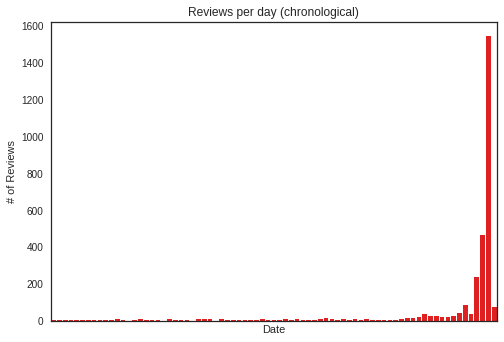

In [0]:
# seaborn countplot of reviews per day
plt.title('Reviews per day (chronological)')

sns.countplot(data=df, x='datetime', color='red')
plt.xticks([])
plt.ylabel('# of Reviews')
plt.xlabel('Date')

;

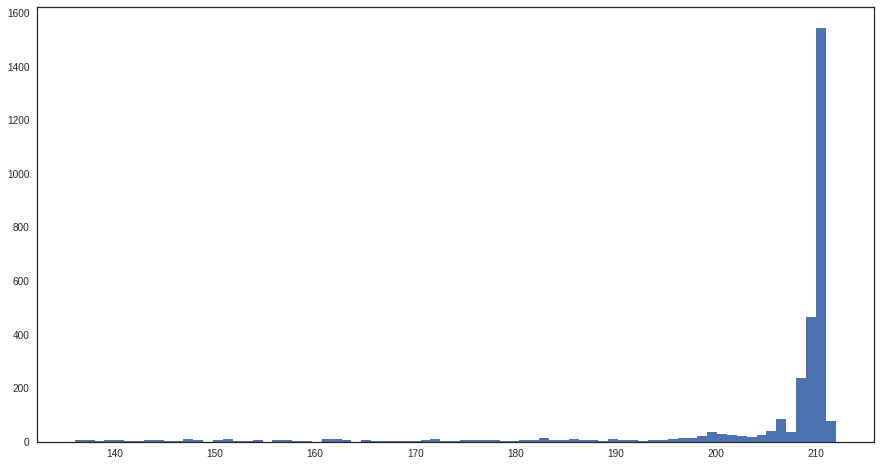

In [0]:
# alternate plot of reviews per day
plt.figure(figsize=(15,8))
plt.hist(df['day_of_year'], bins=77);

In [0]:
# Create a histogram of ratings

In [0]:
# see count of all ratings
df['rating'].value_counts()

5    2178
4     437
1     161
3     152
2      94
Name: rating, dtype: int64

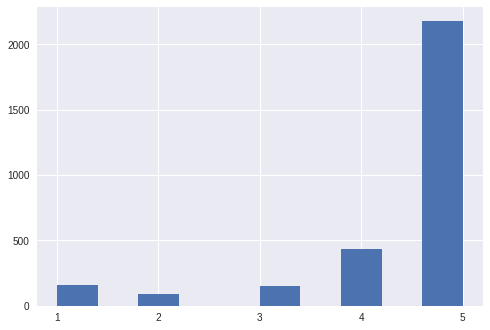

In [0]:
# matplotlib histogram of ratings
plt.xticks(np.arange(1,6, 1))
plt.hist(df['rating']);

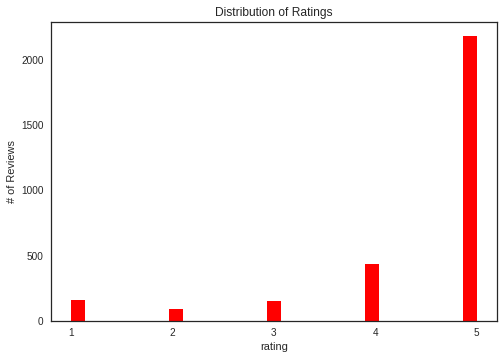

In [0]:
# seaborn distplot
sns.set_style("white")
plt.xticks(np.arange(1,6))
plt.title('Distribution of Ratings')
plt.ylabel('# of Reviews')
plt.xlabel('Rating')
sns.distplot(df['rating'], hist=True, kde=False, color='red', hist_kws=dict(alpha=1) );

## Exploration and Feature Engineering

Let's create some features for our model. Reminder: you are welcome to install and use any packages you wish.


1.   Create a new column called "verified_reviews_clean" that removes filler words from "verified_reviews" like "the", "a", "and", "I", etc. 
2.   Find the most common non-filler words for each rating score. Example:


```
Rating |ReviewsWith_love | ReviewsWith_laugh | ....
1               0                  1              
2               0                  2             
3               2                  1            
...

```

3.   Create dummy variables (1 or 0) for the presence of these words in each review.



In [0]:
# Create a new column called "verified_reviews_clean" that removes filler words
# from "verified_reviews" like "the", "a", "and", "I", etc.

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [0]:
df['verified_reviews'][:10]

0                                          love my echo
2     sometimes while playing a game you can answer ...
3     i have had a lot of fun with this thing my 4 y...
5     i received the echo as a gift i needed another...
6     without having a cellphone i cannot use many o...
7     i think this is the 5th one ive purchased im w...
8                                           looks great
9     love it i’ve listened to songs i haven’t heard...
10    i sent it to my 85 year old dad and he talks t...
11    i love it learning knew things with it eveyday...
Name: verified_reviews, dtype: object

In [0]:
df['verified_reviews_clean'] = df['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [0]:
print(df.head(10))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
2        4  31-Jul-18        Walnut Finish    
3        5  31-Jul-18      Charcoal Fabric    
5        5  31-Jul-18  Heather Gray Fabric    
6        3  31-Jul-18     Sandstone Fabric    
7        5  31-Jul-18      Charcoal Fabric    
8        5  30-Jul-18  Heather Gray Fabric    
9        5  30-Jul-18  Heather Gray Fabric    
10       5  30-Jul-18      Charcoal Fabric    
11       5  30-Jul-18      Charcoal Fabric    

                                     verified_reviews  feedback  word_count  \
0                                        love my echo         1           3   
2   sometimes while playing a game you can answer ...         1          38   
3   i have had a lot of fun with this thing my 4 y...         1          34   
5   i received the echo as a gift i needed another...         1          32   
6   without having a cellphone i cannot use many o...         1          75   
7   i th

In [0]:
# Find the most common non-filler words for each rating score. Example:
# Rating |ReviewsWith_love | ReviewsWith_laugh | ....
# 1               0                  1              
# 2               0                  2             
# 3               2                  1            
# ...

In [0]:
# mean word count by rating
df.groupby('rating')['word_count'].mean()

rating
1    36.068323
2    48.000000
3    39.401316
4    35.443936
5    21.765840
Name: word_count, dtype: float64

In [0]:
# most frequent word count
df.groupby('rating')['word_count'].agg(lambda x:x.value_counts().index[0])

rating
1     0
2    42
3     0
4     4
5     3
Name: word_count, dtype: int64

In [0]:
# eliminate blank entries
df = df[df['verified_reviews_clean'] != '']

In [0]:
# reset index
df = df.reset_index(drop=True)

In [0]:
# most common non-filler word for each rating
df.groupby('rating')['verified_reviews_clean'].apply(lambda x: x.str.split(expand=True).stack().mode().iloc[0])

rating
1    echo
2    echo
3    echo
4    echo
5    love
Name: verified_reviews_clean, dtype: object

Since 'echo' is coming up #1 for every rating, I'm going to expand it a little bit

In [0]:
# top 10 words for each rating
df.groupby('rating')['verified_reviews_clean'].apply(lambda x: x.str.split(expand=True).stack().value_counts()[:10])

rating         
1       echo        49
        amazon      43
        would       31
        one         28
        dot         26
        device      25
        work        24
        product     24
        get         22
        bought      19
2       echo        41
        alexa       33
        device      29
        like        27
        music       24
        play        22
        would       22
        sound       21
        get         20
        use         20
3       echo        53
        alexa       48
        like        36
        speaker     30
        music       28
        sound       27
        quality     26
        dot         26
        better      24
        get         23
4       echo       150
        great      123
        like       117
        alexa      112
        music      100
        use         97
        love        86
        good        69
        sound       68
        would       68
5       love       796
        great      549
        echo      

In [0]:
# Create dummy variables (1 or 0) for the presence of these words in each review.

In [0]:
x1 = df['verified_reviews_clean'][0]

In [0]:
x1.__contains__('love')

True

In [0]:
"love" in x1

True

In [0]:
# dummy variables
df['echo'] = 0
df['love'] = 0
df['great'] = 0
df['like'] = 0
df['easy'] = 0
df['better'] = 0
df['bought'] = 0

In [0]:
# create funtion for dummy variables; checks whether condition is met
def dummies(word):
    for i in range(len(df['verified_reviews_clean'])):
        if word in df['verified_reviews_clean'][i]:
            df[word][i] = 1

In [0]:
# populate 'love' dummy variable
dummies('love')

In [0]:
print(df.head(10))

   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       4  31-Jul-18        Walnut Finish    
2       5  31-Jul-18      Charcoal Fabric    
3       5  31-Jul-18  Heather Gray Fabric    
4       3  31-Jul-18     Sandstone Fabric    
5       5  31-Jul-18      Charcoal Fabric    
6       5  30-Jul-18  Heather Gray Fabric    
7       5  30-Jul-18  Heather Gray Fabric    
8       5  30-Jul-18      Charcoal Fabric    
9       5  30-Jul-18      Charcoal Fabric    

                                    verified_reviews  feedback  word_count  \
0                                       love my echo         1           3   
1  sometimes while playing a game you can answer ...         1          38   
2  i have had a lot of fun with this thing my 4 y...         1          34   
3  i received the echo as a gift i needed another...         1          32   
4  without having a cellphone i cannot use many o...         1          75   
5  i think this is the 5t

In [0]:
dummies('echo')

In [0]:
dummies('great')

In [0]:
dummies('like')

In [0]:
dummies('easy')

In [0]:
dummies('better')

In [0]:
dummies('bought')

In [0]:
print(df.head(20))

    rating       date             variation  \
0        5  31-Jul-18      Charcoal Fabric    
1        4  31-Jul-18        Walnut Finish    
2        5  31-Jul-18      Charcoal Fabric    
3        5  31-Jul-18  Heather Gray Fabric    
4        3  31-Jul-18     Sandstone Fabric    
5        5  31-Jul-18      Charcoal Fabric    
6        5  30-Jul-18  Heather Gray Fabric    
7        5  30-Jul-18  Heather Gray Fabric    
8        5  30-Jul-18      Charcoal Fabric    
9        5  30-Jul-18      Charcoal Fabric    
10       5  30-Jul-18           Oak Finish    
11       5  30-Jul-18      Charcoal Fabric    
12       5  30-Jul-18           Oak Finish    
13       5  30-Jul-18  Heather Gray Fabric    
14       5  30-Jul-18  Heather Gray Fabric    
15       5  30-Jul-18  Heather Gray Fabric    
16       5  30-Jul-18      Charcoal Fabric    
17       4  30-Jul-18     Sandstone Fabric    
18       5  30-Jul-18      Charcoal Fabric    
19       5  30-Jul-18      Charcoal Fabric    

            

## Prediction

Create a model using your new features to predict the rating score given the review.


1.   Split the dataset into a training and test set using the method of your choice.
2.   Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible. In the text cell, explain how you chose your model and loss function.



In [0]:
# Split the dataset into a training and test set using the method of your choice.

In [0]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'word_count', 'datetime', 'day_of_year', 'day_of_week',
       'verified_reviews_clean', 'echo', 'love', 'great', 'like', 'easy',
       'better', 'bought'],
      dtype='object')

In [0]:
print(df.head(1))

   rating       date         variation verified_reviews  feedback  word_count  \
0       5  31-Jul-18  Charcoal Fabric      love my echo         1           3   

    datetime  day_of_year  day_of_week verified_reviews_clean  echo  love  \
0 2018-07-31          212            1              love echo     1     1   

   great  like  easy  better  bought  
0      0     0     0       0       0  


In [0]:
from sklearn.model_selection import train_test_split

X = df[['feedback', 'word_count', 'day_of_year', 'day_of_week',
       'echo', 'love', 'great', 'like', 'easy', 'better', 'bought']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
# linear regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

# cross-val
from sklearn.model_selection import cross_val_score

In [0]:
# adding some scoring options
from sklearn.metrics import mean_squared_error

# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
      
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [0]:
def build_model(type):
    model = type
    model_fit = model.fit(X_train, y_train)
    model_preds = model.predict(X_test)
    model_result = model_fit.score(X_test, y_test)
    
    model_cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_log_error')
    model_cv_rmsle = np.sqrt(np.abs(model_cv_scores.mean()))
    
    print("=== RESULTS: " + str(type) + " ===")
    print("R2: " + str(model_result))
    print("RMSLE: " + str(rmsle(model_preds, y_test)))
    print("RMSE: " + str(rmse(model_preds, y_test)))
    print("Mean RMSLE Score: ", model_cv_rmsle.mean())
    print("\n")
    

In [0]:
# Random Forest Regression
build_model(RandomForestRegressor())

=== RESULTS: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False) ===
R2: 0.7944168675104424
RMSLE: 0.10899261314617793
RMSE: 0.49516850484814323
Mean RMSLE Score:  0.11353144274860735




In [0]:
# Extra Trees Regression
build_model(ExtraTreesRegressor())

=== RESULTS: ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False) ===
R2: 0.7861433830058057
RMSLE: 0.11343634918267233
RMSE: 0.5050340040628006
Mean RMSLE Score:  0.11669105633139591




In [0]:
# Linear Regression
build_model(LinearRegression())

=== RESULTS: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) ===
R2: 0.789564262788842
RMSLE: 0.11168779915801569
RMSE: 0.5009784236701211
Mean RMSLE Score:  0.1161527405340866




**Random Forest** has the best results from the above test in terms of R-squared and RMSLE. Though, the results are very similar to Extra Trees and Linear Regression.

In [0]:
# Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible.


In [0]:
X_test.index.values

array([ 840, 1037, 2399,  678,  196,  430, 1340, 2593, 1742, 2671, 2290,
        567,  393, 2538, 1766, 1487, 2420, 1807,  962, 1512,  642, 1533,
        175, 2243, 2840, 2515, 1896, 1556, 1569, 2833, 1457, 2760, 2829,
       2724, 2702, 1123,  650, 1188, 2844, 1779, 1563, 2579, 2131, 2376,
       2469, 1586, 2873, 2473, 1554, 1321,  298, 1229,  124, 1754,  321,
       1511,  944,  511, 1239, 2478, 1422, 2624, 2188, 1878, 2677, 1618,
        838, 2111, 1071, 1839, 1926, 1873,  506, 2726,  178, 2638, 1992,
        879,  366,   51,  736, 2120, 2826,  691, 1338,  296,  764, 1273,
        693,  102, 1208,  598, 1543, 2634, 1990,  565, 2497, 2042, 2043,
       1977, 1451,   67, 2566, 2606,  246, 2496, 2451, 2236, 1610, 1359,
       1726, 1860, 1235, 2733,  644, 2792, 1368,  322, 1057,  685,  203,
       1651, 2588,  528, 1509,  727, 1237, 1475,  605,  941,  387, 1376,
        900,  457, 2409,  555, 2162, 1731, 2031, 2560, 2921, 1234, 2112,
        998,  256,  929,   32, 2614, 1292, 2001,  9

In [0]:
def model_pred(type):
    model = type
    model_fit = model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_result = model_fit.score(X_test, y_test)
        
    return X_test.index.values, model_pred

In [0]:
predictions = model_pred(RandomForestRegressor())

In [0]:
df.loc[df.index[someRowNumber], 'New Column Title'] = "some value"

I wasn't quite sure what was wanted for this last question, so I did not finish it. Wasn't sure if the new column was supposed to have only the predictions from the validation data (after the train-test split), or if I needed to come up with predictions for all the training values.

### Explain how you chose your model and loss function.

I choose a regression model since that gives more precise results. Within regression, I thought something from the Decision Tree / Random Forest family would do best given the weak predictors here. However, Linear Regression performed similarly well. 

## Bonus Points
For bonus points, write a sentence or two about how you could further improve your model. This is not required.

This is not a deep learning model, so turning it into one could improve performance. We would need to use embeddings to transforms each review into a vector of numbers. 

Without using deep learning, I think adding more words as dummy variables could help. I tried to focus on unique words, and I think continuning that approach would be best, as it seems like many words are common thorughout all the reviews ('echo', 'alexa', etc). 

## Conclusion
Thanks for completing the Iris Analytics Data Science Challenge! Submit your notebook to cprinzz@gmail.com for review. We'll get back to you within 48 hours with your results. You can download your notebook by clicking File > Download .ipynb.